In [3]:
pip install --upgrade numexpr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.1/384.1 kB 24.9 MB/s eta 0:00:00
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.7.3
    Uninstalling numexpr-2.7.3:
      Successfully uninstalled numexpr-2.7.3
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
        
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=Warning)

In [9]:
bucket = 'group15awsprojectbucket'


file_key = 'datafolder/heart_2020_cleaned.csv'

# Construct the full S3 path
data_location = 's3://{}/{}'.format(bucket, file_key)

# Read the data into a Pandas DataFrame
df = pd.read_csv(data_location)


df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [14]:
print(df.shape)
df.info()

(319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyD

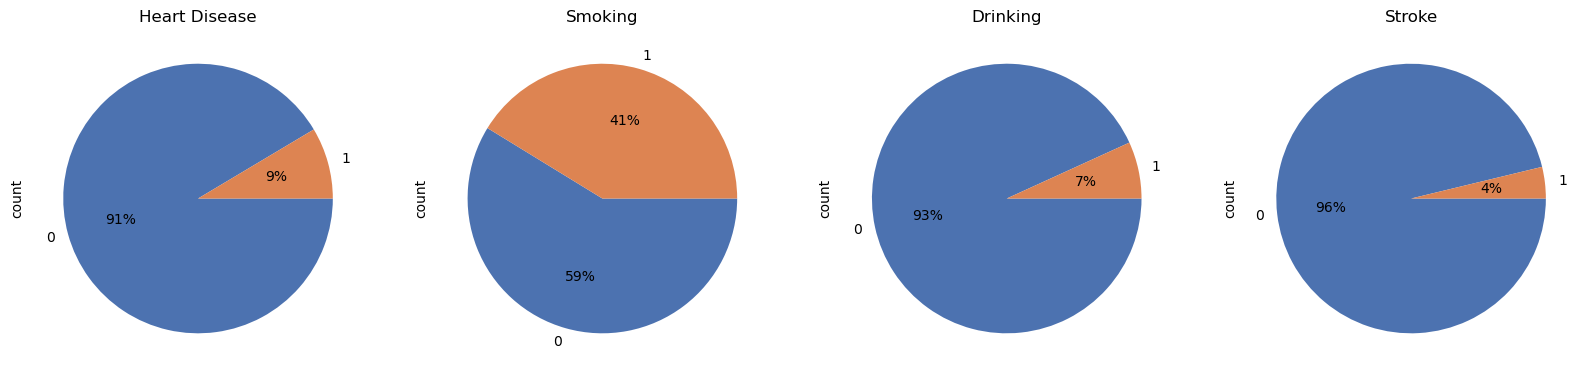

In [25]:
plt.figure(figsize=(20,20))
colors = sns.color_palette('deep')

plt.subplot(1, 4, 1)
df['HeartDisease'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Heart Disease')

plt.subplot(1, 4, 2)
df['Smoking'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Smoking')

plt.subplot(1, 4, 3)
df['AlcoholDrinking'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Drinking')

plt.subplot(1, 4, 4)
df['Stroke'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Stroke')

plt.show()

In [21]:
df['HeartDisease'] = df['HeartDisease'].replace(['No', 'Yes'], [0, 1])
df['Smoking'] = df['Smoking'].replace(['No', 'Yes'], [0, 1])
df['AlcoholDrinking'] = df['AlcoholDrinking'].replace(['No', 'Yes'], [0, 1])
df['Stroke'] = df['Stroke'].replace(['No', 'Yes'], [0, 1])

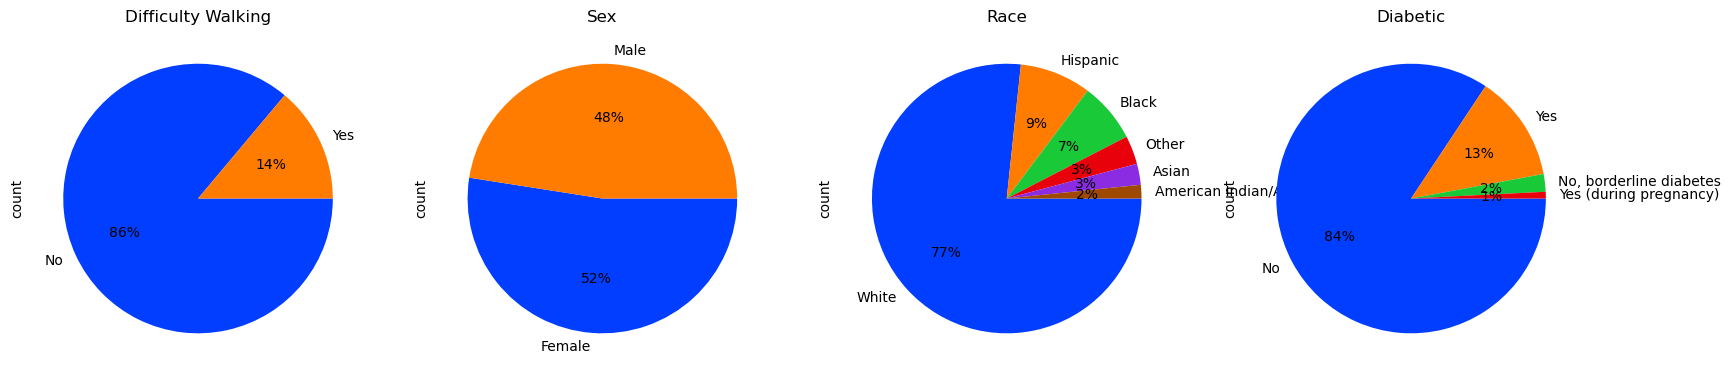

In [23]:
plt.figure(figsize=(20,20))
colors = sns.color_palette('bright')

plt.subplot(1, 4, 1)    
df['DiffWalking'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Difficulty Walking')

plt.subplot(1, 4, 2)    
df['Sex'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Sex')

plt.subplot(1, 4, 3)    
df['Race'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Race')

plt.subplot(1, 4, 4)    
df['Diabetic'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Diabetic')

plt.show()

In [27]:
df['DiffWalking'] = df['DiffWalking'].replace(['No', 'Yes'], [0, 1])
df['Sex'] = df['Sex'].replace(['Female', 'Male'], [0, 1])

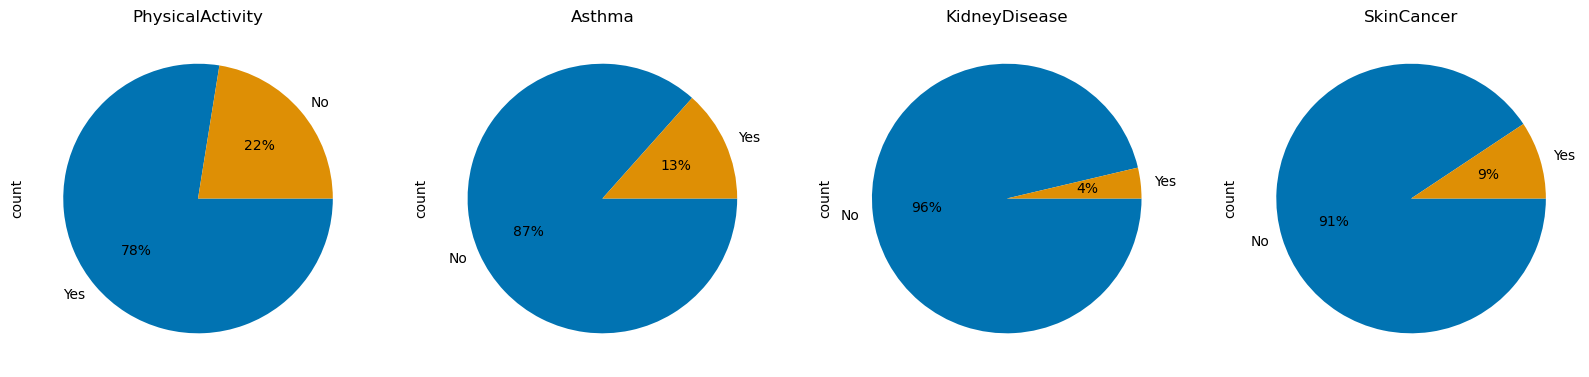

In [31]:
plt.figure(figsize=(20,20))
colors = sns.color_palette('colorblind')

plt.subplot(1, 4, 1)    
df['PhysicalActivity'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('PhysicalActivity')

plt.subplot(1, 4, 2)    
df['Asthma'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('Asthma')

plt.subplot(1, 4, 3)    
df['KidneyDisease'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('KidneyDisease')

plt.subplot(1, 4, 4)    
df['SkinCancer'].value_counts().plot.pie(counterclock=False, autopct='%.0f%%', colors = colors)
plt.title('SkinCancer')

plt.show()

In [33]:
df['PhysicalActivity'] = df['PhysicalActivity'].replace(['No', 'Yes'], [0, 1]) # do you play any sports?
df['Asthma'] = df['Asthma'].replace(['No', 'Yes'], [0, 1])
df['KidneyDisease'] = df['KidneyDisease'].replace(['No', 'Yes'], [0, 1])
df['SkinCancer'] = df['SkinCancer'].replace(['No', 'Yes'], [0, 1])

In [34]:
HeartDisease_AgeCategory = df.groupby(['AgeCategory', 'HeartDisease'], as_index=False).agg(n = ('AgeCategory', 'count'))
HeartDisease_Race = df.groupby(['Race', 'HeartDisease'], as_index=False).agg(n = ('Race', 'count'))
HeartDisease_Diabetic = df.groupby(['Diabetic', 'HeartDisease'], as_index=False).agg(n = ('Diabetic', 'count'))
HeartDisease_GenHealth = df.groupby(['GenHealth', 'HeartDisease'], as_index=False).agg(n = ('GenHealth', 'count'))

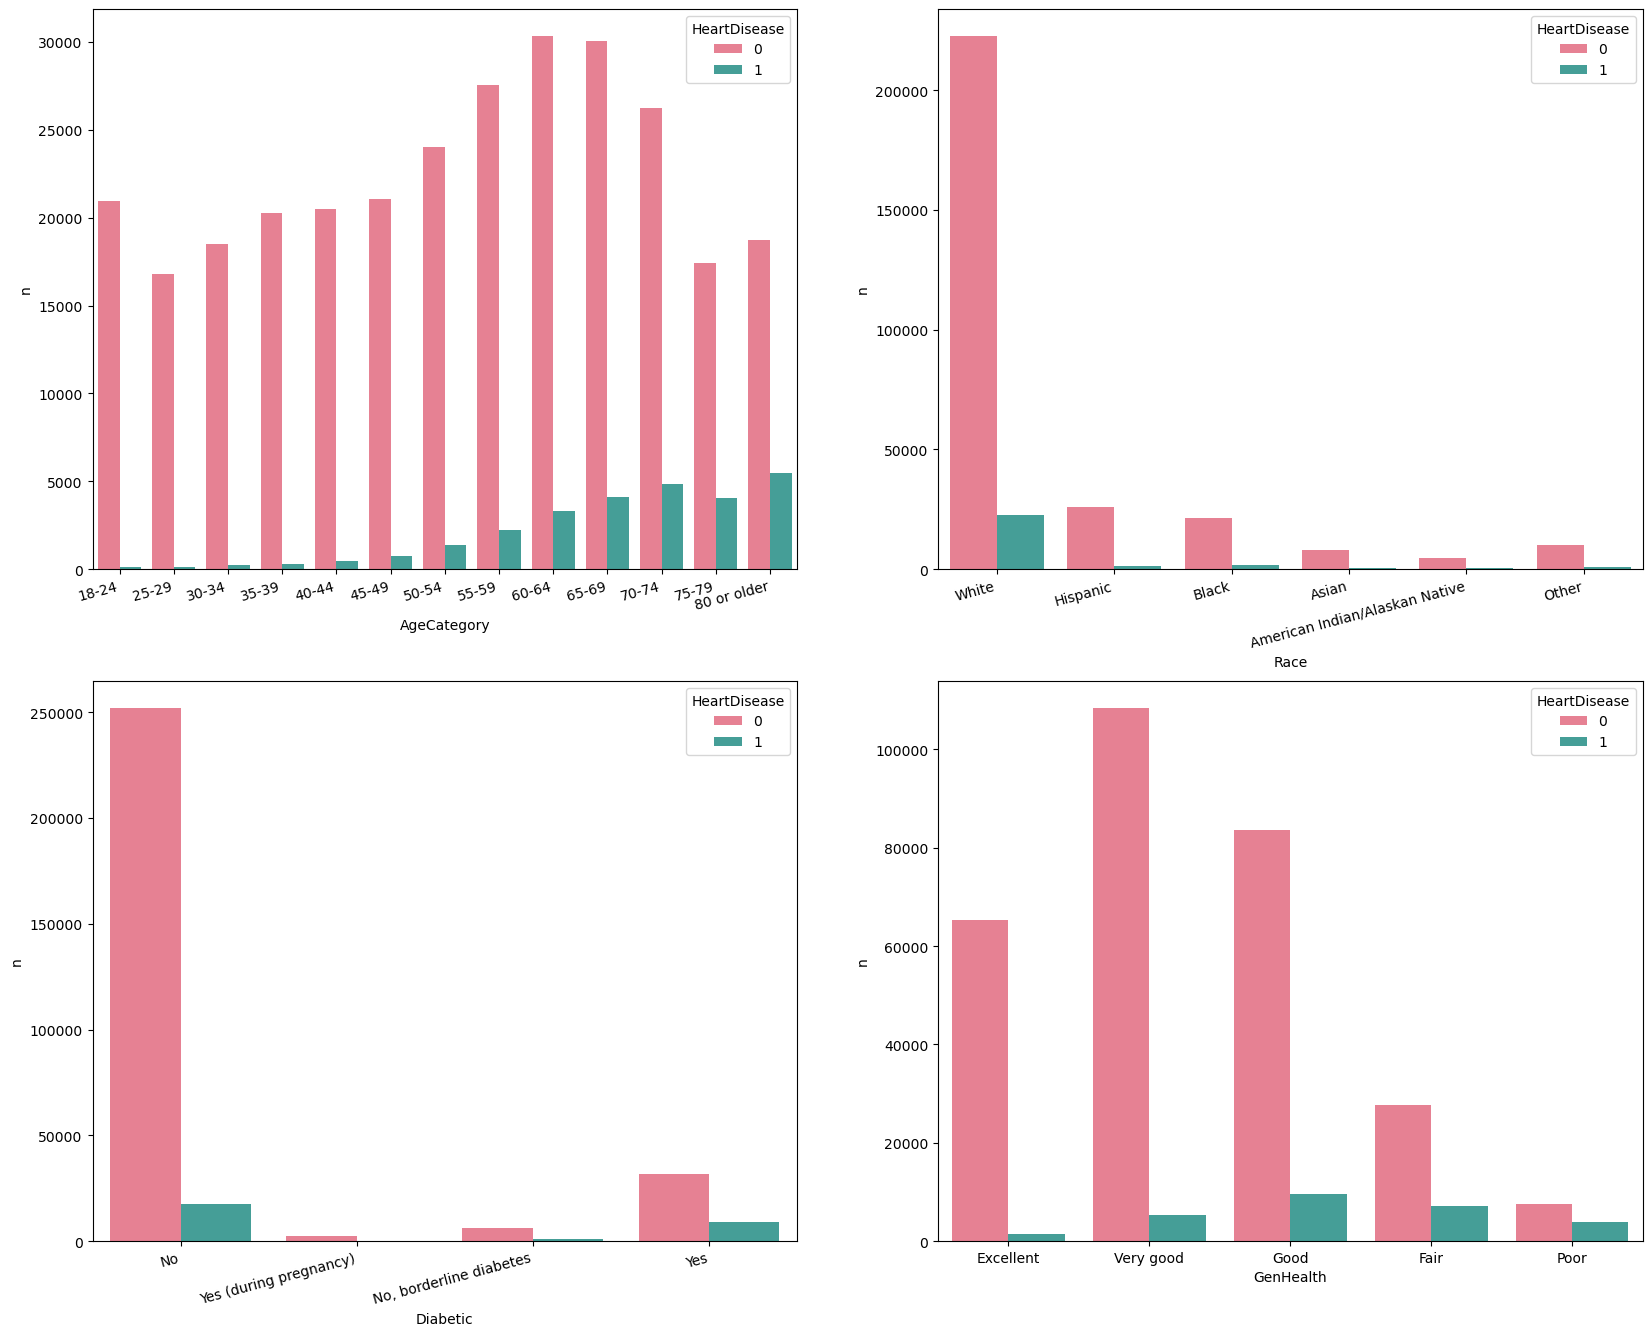

In [39]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
plt.xticks(rotation=15, ha='right')
sns.barplot(data=HeartDisease_AgeCategory, x='AgeCategory', y='n', hue="HeartDisease", palette='husl')

plt.subplot(2, 2, 2)
plt.xticks(rotation=15, ha='right')
sns.barplot(data=HeartDisease_Race, x='Race', y='n', hue="HeartDisease", palette='husl', 
            order=['White', 'Hispanic', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other'])

plt.subplot(2, 2, 3)
plt.xticks(rotation=15, ha='right')
sns.barplot(data=HeartDisease_Diabetic, x='Diabetic', y='n', hue="HeartDisease", 
            palette='husl', order=['No', 'Yes (during pregnancy)', 'No, borderline diabetes', 'Yes'])

plt.subplot(2, 2, 4)
sns.barplot(data=HeartDisease_GenHealth, x='GenHealth', y='n', hue="HeartDisease", 
            palette='husl', order=['Excellent', 'Very good', 'Good', 'Fair', 'Poor'])

plt.show()

In [41]:
df['AgeCategory'] = df['AgeCategory'].replace(['18-24', '25-29', '30-34', '35-39', '40-44', '25-29', 
                                                           '30-34', '35-40', '41-44', '45-49', '50-54', '55-59', 
                                                           '60-64', '65-69', '70-74', '75-79', '80 or older'], 
                                                          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
df['Race'] = df['Race'].replace(['White', 'Hispanic', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other'], 
                                            [0, 1, 2, 3, 4, 5])
df['Diabetic'] = df['Diabetic'].replace(['No', 'Yes (during pregnancy)', 'No, borderline diabetes', 'Yes'], 
                                                    [0, 1, 2, 3])
df['GenHealth'] = df['GenHealth'].replace(['Excellent', 'Very good', 'Good', 'Fair','Poor'], 
                                                      [0, 1, 2, 3, 4])

(319795, 5)


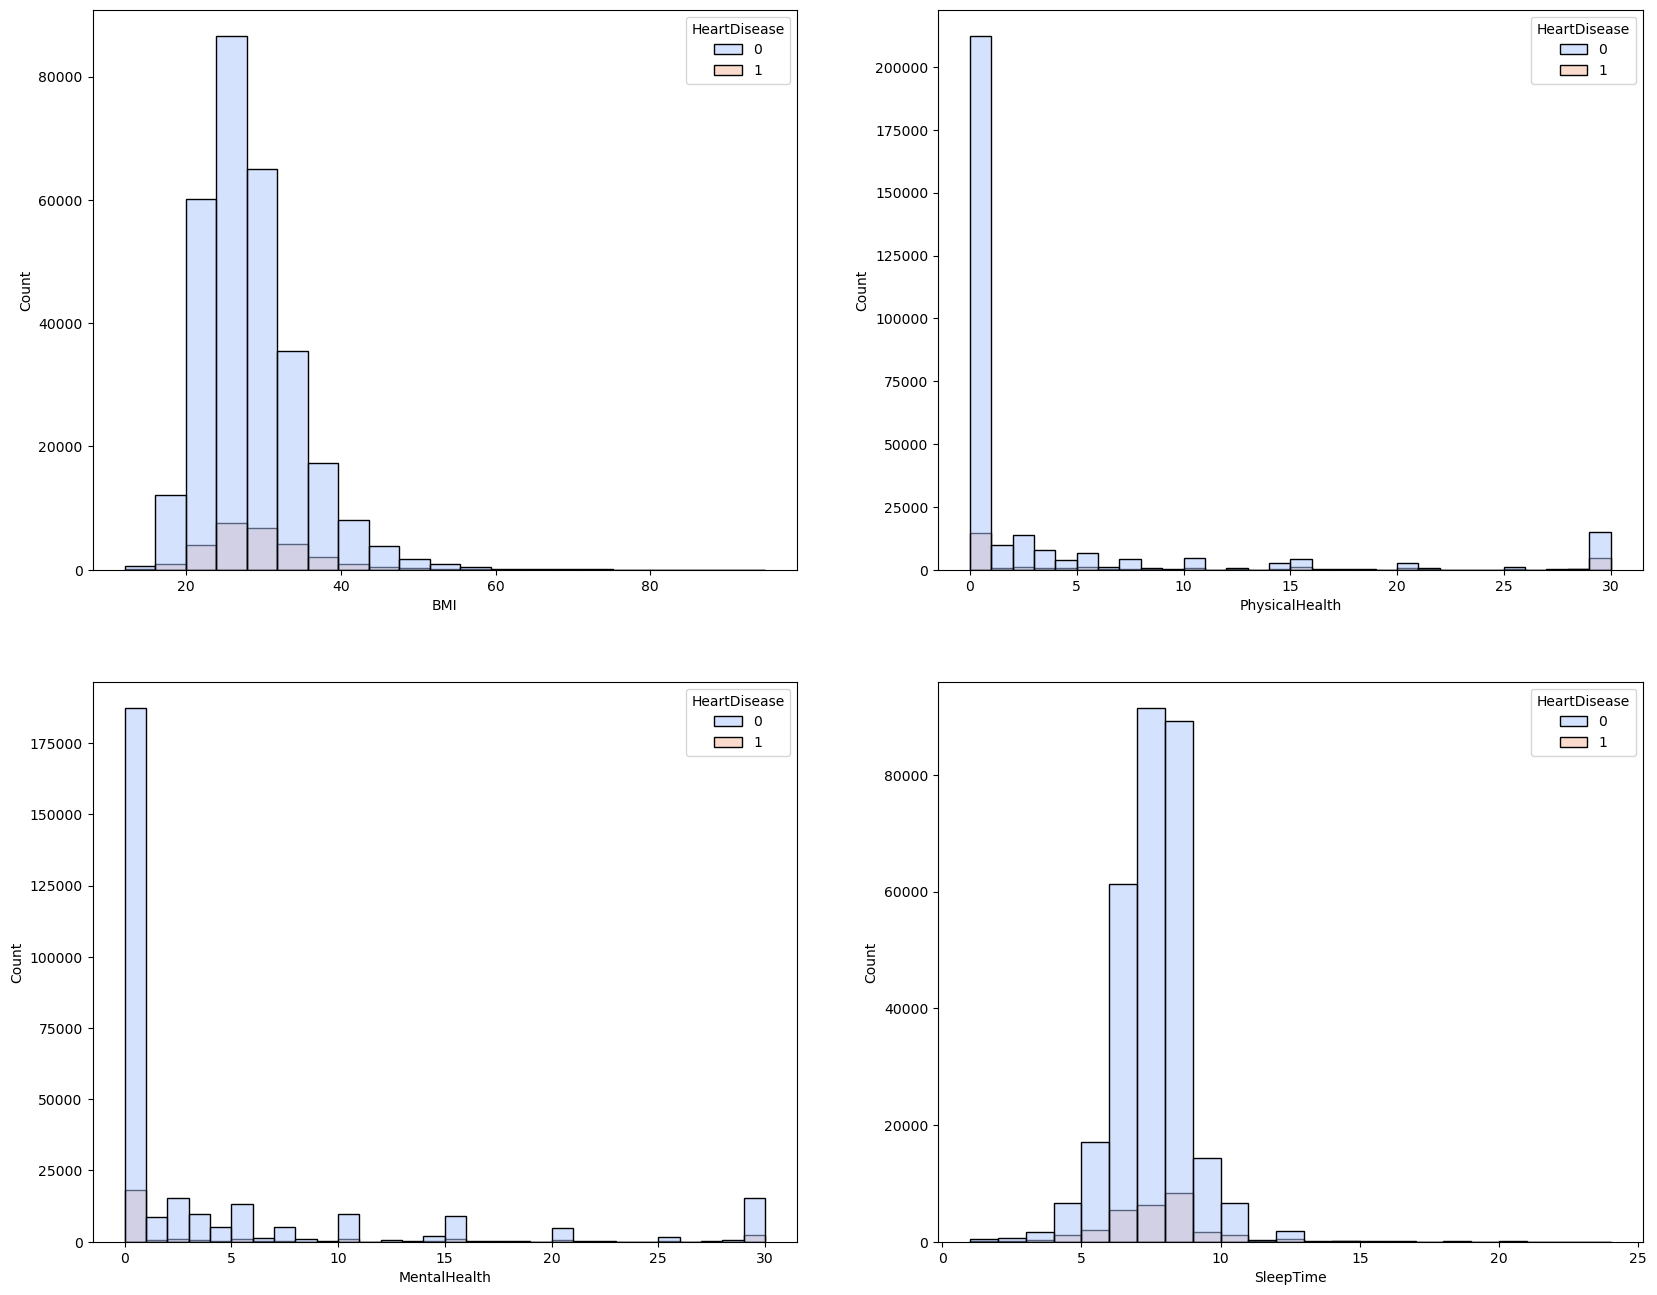

In [44]:
df_num = df[['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]
print(df_num.shape)
df_num.head()

plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1) 
sns.histplot(df_num, x='BMI', hue='HeartDisease', binwidth=4, palette='coolwarm')

plt.subplot(2, 2, 2) 
sns.histplot(df_num, x='PhysicalHealth', hue='HeartDisease', binwidth=1, palette='coolwarm')

plt.subplot(2, 2, 3) 
sns.histplot(df_num, x='MentalHealth', hue='HeartDisease', binwidth=1, palette='coolwarm')

plt.subplot(2, 2, 4) 
sns.histplot(df_num, x='SleepTime', hue='HeartDisease', binwidth=1, palette='coolwarm')

plt.show()

In [46]:
corrmat = df.corr()
corrmat

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.220876,-0.023518,0.181858,-0.100030,0.243182,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,0.006944,0.030196,0.212971,-0.150616,0.230720,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.124256,-0.028578,0.058520,-0.097174,0.174717,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.054905,-0.021332,-0.059408,0.017487,-0.029780,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.130795,0.008806,0.108457,-0.079455,0.168090,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.109933,0.011721,0.160228,-0.232283,0.482697,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.148220,0.029956,0.029578,-0.095808,0.241625,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.232886,0.017054,0.219553,-0.278524,0.413797,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.062342,-0.006353,0.011578,0.048247,-0.025947,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.220876,0.006944,0.124256,-0.054905,0.130795,0.109933,-0.148220,0.232886,-0.062342,1.000000,-0.137561,0.211700,-0.115629,0.182516,0.094555,-0.054414,0.116167,0.248216


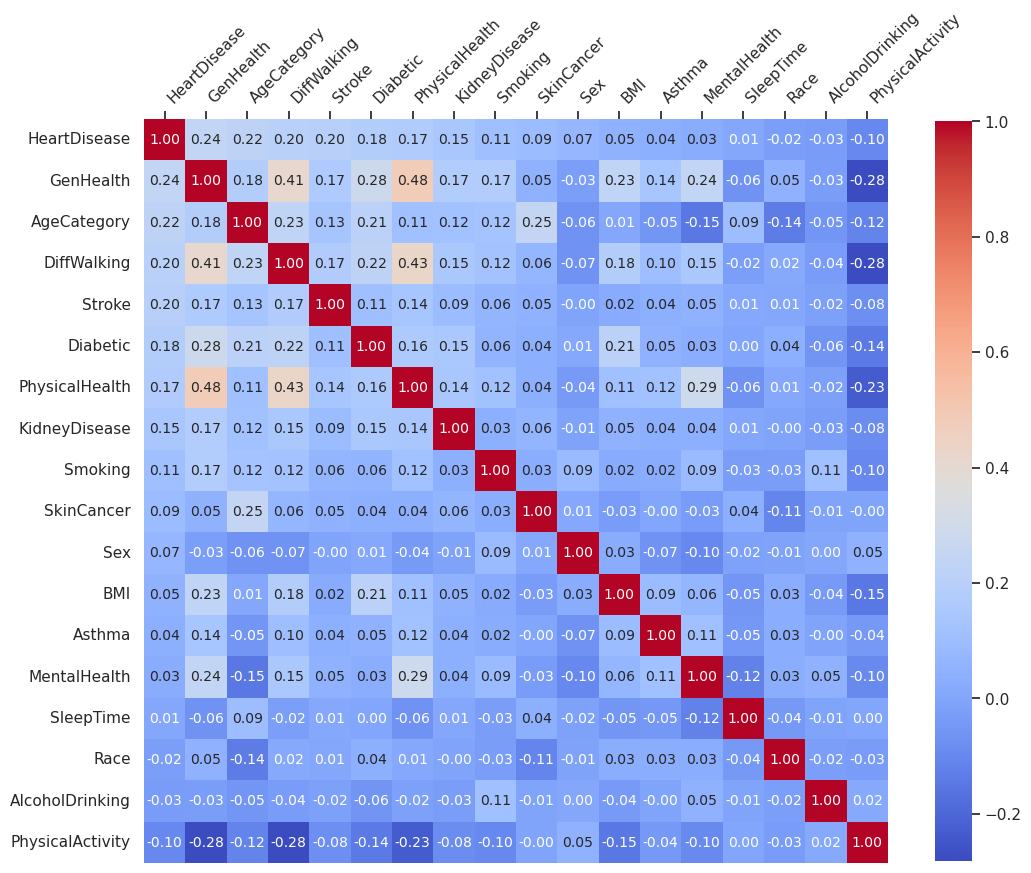

In [47]:
plt.figure(figsize=(12, 12))
k = 18
cols = corrmat.nlargest(k, 'HeartDisease')['HeartDisease'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values, cmap="coolwarm", cbar_kws={"shrink": 0.8})
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

In [49]:
pip install imbalanced-learn

3637.99s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.9 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [50]:
target = df['HeartDisease']
feature = df.drop(['HeartDisease'], axis=1)

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

feature_balanced, target_balanced = oversample.fit_resample(feature, target)
target_balanced.value_counts()

HeartDisease
0    292422
1    292422
Name: count, dtype: int64

In [51]:
balanced_df = pd.concat([target_balanced, feature_balanced], axis=1)
balanced_df.head(1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.6,1,0,0,3.0,30.0,0,0,11,0,3,1,1,5.0,1,0,1


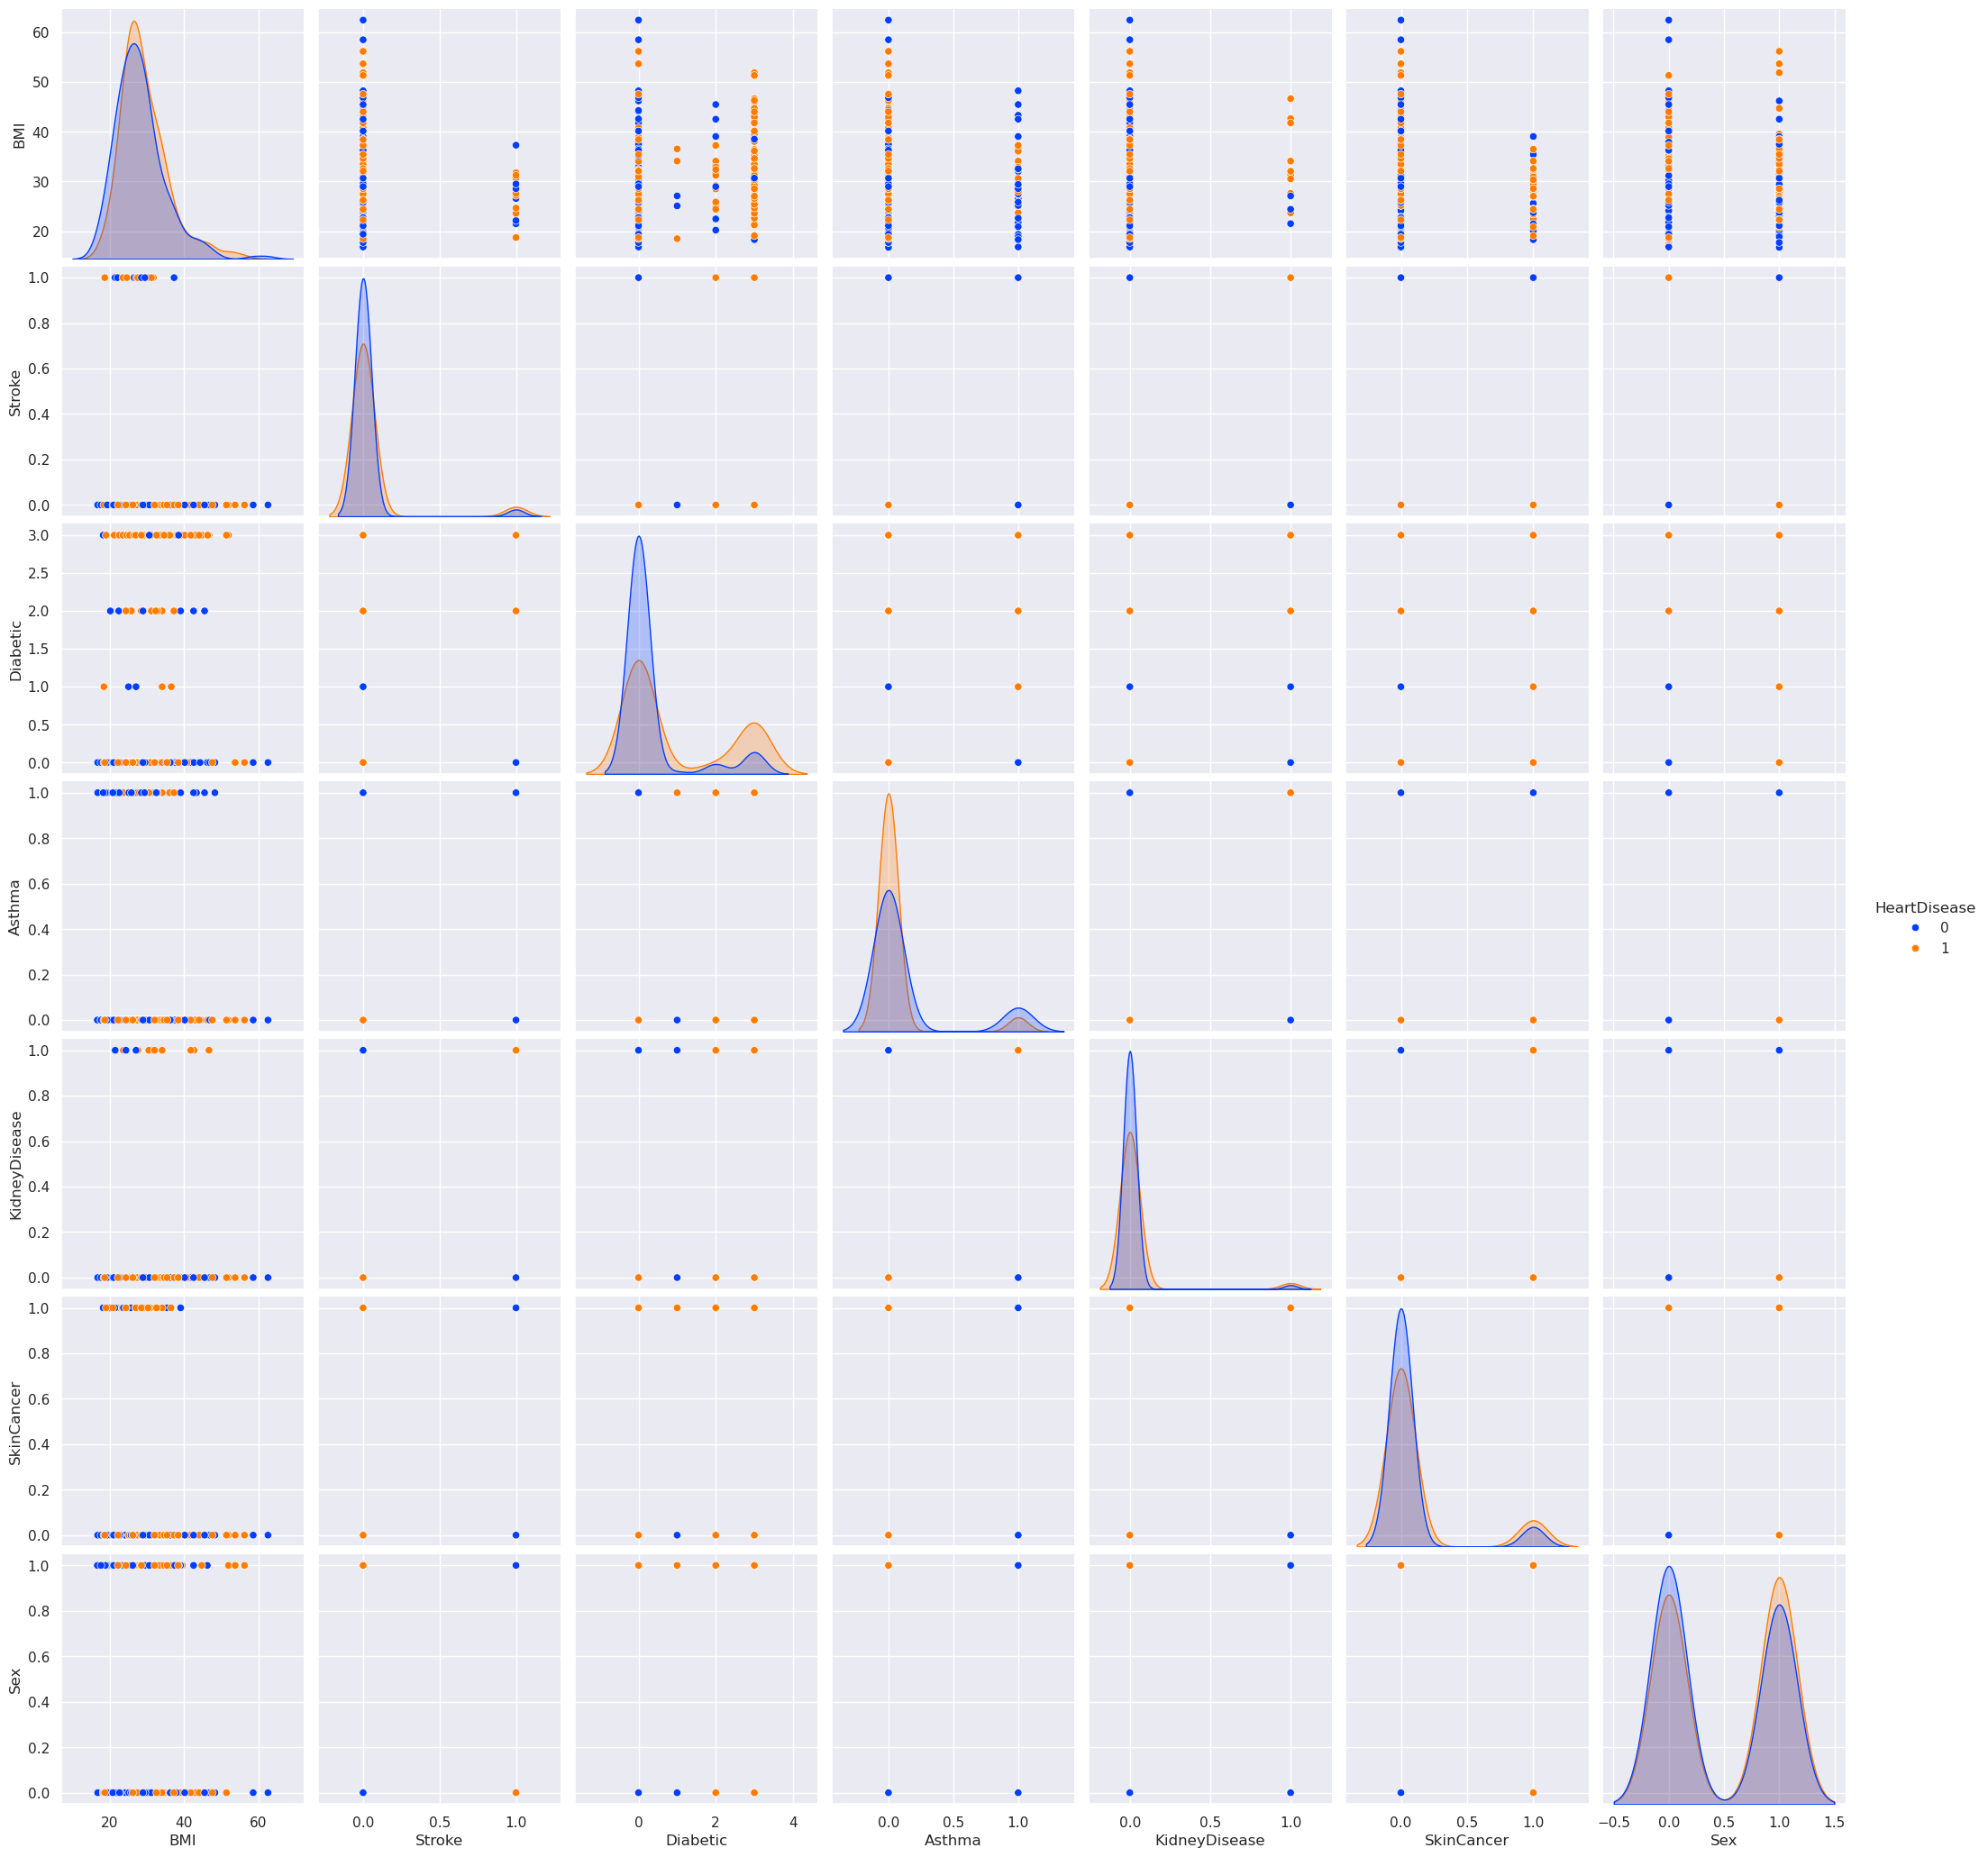

In [56]:
balanced_df_2 = balanced_df[['HeartDisease', 'BMI', 'Stroke', 'Diabetic', 
                                         'Asthma', 'KidneyDisease', 'SkinCancer', 'Sex']]

balanced_2_sample = balanced_df_2.sample(500)

sns.pairplot(balanced_2_sample, hue = "HeartDisease", size = 3, palette = 'bright')
plt.show()

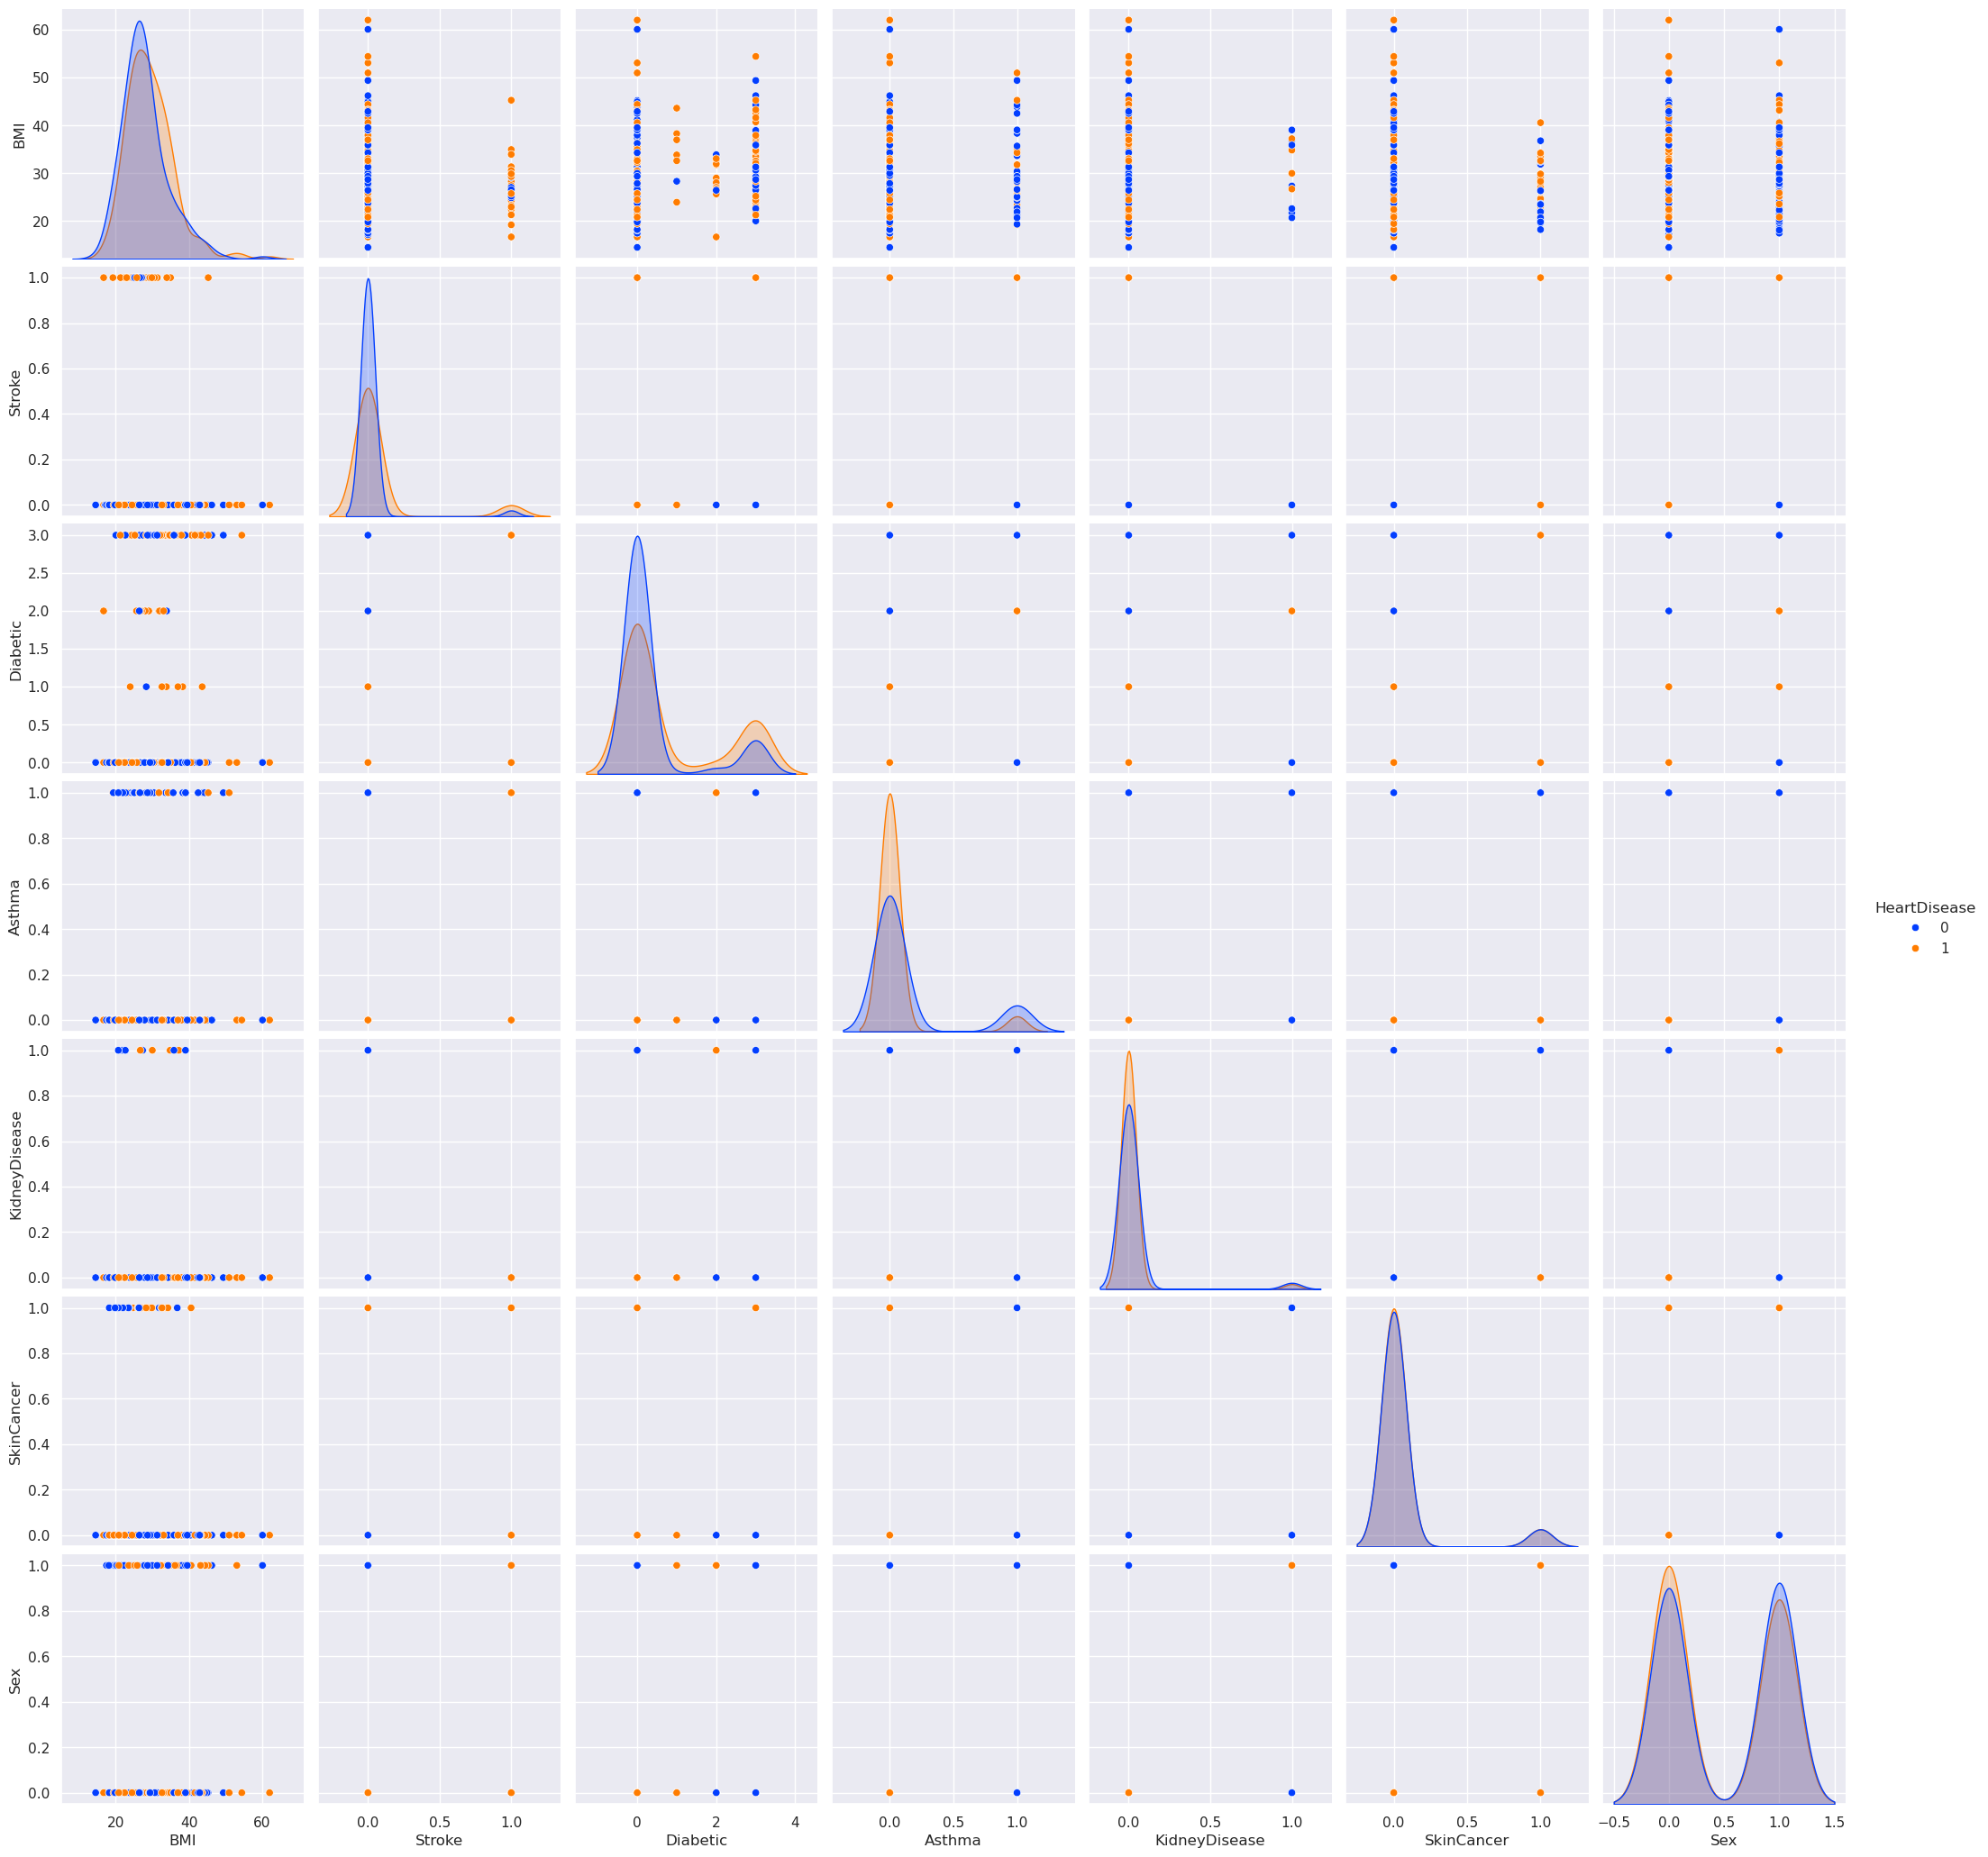

In [57]:
balanced_df_2 = balanced_df[['HeartDisease', 'BMI', 'Stroke', 'Diabetic', 
                                         'Asthma', 'KidneyDisease', 'SkinCancer', 'Sex']]

balanced_2_sample = balanced_df_2.sample(500)

sns.pairplot(balanced_2_sample, hue = "HeartDisease", size = 3, palette = 'bright')
plt.show()

In [58]:
print(feature.shape)
target.value_counts()

(319795, 17)


HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [59]:
print(feature_balanced.shape)
target_balanced.value_counts()

(584844, 17)


HeartDisease
0    292422
1    292422
Name: count, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split, KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 2309)
for tr_idx, te_idx in kf.split(feature):
    X_train, X_test = feature.iloc[tr_idx], feature.iloc[te_idx]
    y_train, y_test = target.iloc[tr_idx], target.iloc[te_idx]
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((255836, 17), (63959, 17), (255836,), (63959,))

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)
X_test_scaled.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000,63959.000000
mean,0.002419,-0.005898,-0.002511,-0.003358,0.002695,0.003344,0.000509,0.006066,-0.007145,0.008211,-0.003737,0.000543,0.000270,0.003407,0.003421,-0.004121,-0.002069
std,0.999743,0.998948,0.995694,0.991838,1.002877,1.003092,1.000539,1.000297,1.003752,1.011502,0.996245,0.999649,0.998286,1.022931,1.003675,0.989837,0.997110
min,-2.555261,-0.838895,-0.270589,-0.198390,-0.423775,-0.489673,-0.401519,-0.950556,-2.087794,-0.453031,-0.422469,-1.857610,-1.346639,-4.264825,-0.393071,-0.195983,-0.320904
25%,-0.675273,-0.838895,-0.270589,-0.198390,-0.423775,-0.489673,-0.401519,-0.950556,-1.015806,-0.453031,-0.422469,0.538326,-0.388120,-0.766831,-0.393071,-0.195983,-0.320904
50%,-0.154540,-0.838895,-0.270589,-0.198390,-0.423775,-0.489673,-0.401519,-0.950556,0.270581,-0.453031,-0.422469,0.538326,-0.388120,-0.067232,-0.393071,-0.195983,-0.320904
75%,0.484970,1.192044,-0.270589,-0.198390,-0.172084,-0.112329,-0.401519,1.052016,0.699376,-0.453031,-0.422469,0.538326,0.570400,0.632367,-0.393071,-0.195983,-0.320904
max,10.436321,1.192044,3.695636,5.040587,3.351583,3.283767,2.490541,1.052016,1.342569,3.749928,2.498212,0.538326,2.487439,11.825948,2.544068,5.102490,3.116201


In [63]:
pip install xgboost

4242.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [64]:
import xgboost as xgb
from xgboost import plot_importance

xgb_class = xgb.XGBClassifier(random_state = 2309)
xgb_class.fit(X_train_scaled, y_train)

xgb_class.score(X_train_scaled, y_train)

0.9220203567910693

In [65]:
pred = xgb_class.predict(X_test_scaled)
pred[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [66]:
y_test[:20].array

<NumpyExtensionArray>
[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Length: 20, dtype: int64

In [67]:
xgb_class.score(X_test_scaled, y_test)

0.9160712331337263

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print(confusion_matrix(y_test, pred))

[[58048   468]
 [ 4900   543]]


In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58516
           1       0.54      0.10      0.17      5443

    accuracy                           0.92     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.92      0.89     63959



Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier(n_estimators= 50 , max_depth= 5 , max_features=12)

In [77]:
rf.fit(X_train_scaled , y_train);

In [81]:
print (rf.score(X_test_scaled, y_test))

0.9161337731984552


In [83]:
pred = rf.predict(X_test_scaled)
pred[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
print(confusion_matrix(y_test, pred))

[[58292   224]
 [ 5141   302]]


In [93]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58516
           1       0.57      0.06      0.10      5443

    accuracy                           0.92     63959
   macro avg       0.75      0.53      0.53     63959
weighted avg       0.89      0.92      0.88     63959



In [87]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 5 , max_features= 18)

In [88]:
dt.fit(X_train_scaled , y_train)

In [89]:
print (dt.score(X_test_scaled, y_test))

0.9161181381822731


In [95]:
pred = dt.predict(X_test_scaled)
pred[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [94]:
print(confusion_matrix(y_test, pred))

[[58292   224]
 [ 5141   302]]


In [96]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58516
           1       0.57      0.06      0.10      5443

    accuracy                           0.92     63959
   macro avg       0.75      0.53      0.53     63959
weighted avg       0.89      0.92      0.88     63959



Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [116]:
dt = DecisionTreeClassifier(max_depth=5, max_features=18)
dt.fit(X_train_scaled, y_train)
print("Initial Model Score:", dt.score(X_test_scaled, y_test))

Initial Model Score: 0.9161181381822731


In [117]:
pred = dt.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Confusion Matrix:
 [[58292   224]
 [ 5141   302]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     58516
           1       0.57      0.06      0.10      5443

    accuracy                           0.92     63959
   macro avg       0.75      0.53      0.53     63959
weighted avg       0.89      0.92      0.88     63959



In [118]:
# parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [119]:
# Initialize Grid Search
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy')

In [120]:
# Fit grid search
grid_search_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [121]:
# Best parameters
best_params = grid_search_dt.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [122]:
# Train and evaluate the decision tree with the best parameters
dt_optimized = DecisionTreeClassifier(**best_params)
dt_optimized.fit(X_train_scaled, y_train)

print("Optimized Model Score:", dt_optimized.score(X_test_scaled, y_test))

Optimized Model Score: 0.9151644021951563


In [123]:
pred_optimized = dt_optimized.predict(X_test_scaled)
print("Confusion Matrix for Optimized Model:\n", confusion_matrix(y_test, pred_optimized))

Confusion Matrix for Optimized Model:
 [[58477    39]
 [ 5387    56]]


In [124]:
print("Classification Report for Optimized Model:\n", classification_report(y_test, pred_optimized))

Classification Report for Optimized Model:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     58516
           1       0.59      0.01      0.02      5443

    accuracy                           0.92     63959
   macro avg       0.75      0.50      0.49     63959
weighted avg       0.89      0.92      0.88     63959



In [100]:
from sklearn import metrics
plt.figure()
models = [{
    'label': 'XGBoost',
    'model': xgb_class,
    },
    {
    'label': 'Randomforest',
    'model': rf,
    },
    {
    'label': 'DescesionTree',
    'model': dt      
    }]

<Figure size 640x480 with 0 Axes>

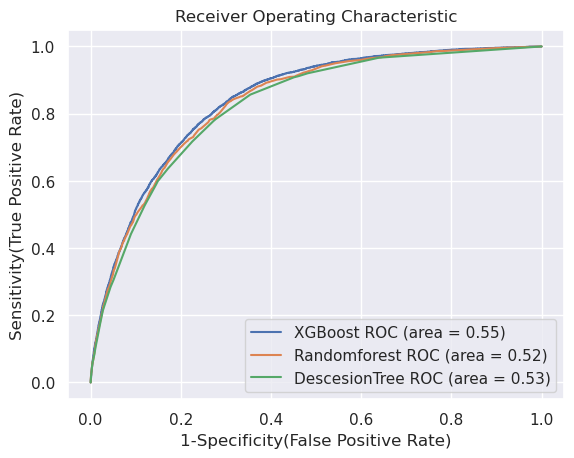

In [101]:
for m in models:
    model = m['model'] 
    y_pred=model.predict(X_test_scaled)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
        # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_scaled))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [102]:
print(feature_balanced.shape)
target_balanced.value_counts()

(584844, 17)


HeartDisease
0    292422
1    292422
Name: count, dtype: int64

In [103]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2309)
for tr_idx, te_idx in kf.split(feature_balanced):
    X_train_balanced, X_test_balanced = feature_balanced.iloc[tr_idx], feature_balanced.iloc[te_idx]
    y_train_balanced, y_test_balanced = target_balanced.iloc[tr_idx], target_balanced.iloc[te_idx]
    
X_train_balanced.shape, X_test_balanced.shape, y_train_balanced.shape, y_test_balanced.shape

((467876, 17), (116968, 17), (467876,), (116968,))

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_balanced)

X_train_balanced_scaled = scaler.transform(X_train_balanced)
X_test_balanced_scaled = scaler.transform(X_test_balanced)

X_train_balanced_scaled = pd.DataFrame(data=X_train_balanced_scaled, columns=X_train_balanced.columns)
X_test_balanced_scaled = pd.DataFrame(data=X_test_balanced_scaled, columns=X_test_balanced.columns)
X_test_balanced_scaled.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000,116968.000000
mean,-0.000100,-0.001907,-0.004293,0.001968,-0.002239,0.001422,-0.000862,0.004367,-0.004051,0.001535,-0.000288,-0.005360,-0.000949,-0.003912,0.002727,-0.002585,-0.000653
std,0.998876,0.999749,0.989812,1.004474,0.998684,0.999975,0.999301,1.000239,1.000219,1.002615,0.999528,1.001851,0.999924,1.000886,1.003635,0.993461,0.999070
min,-2.585279,-0.876096,-0.203128,-0.209918,-0.539244,-0.494276,-0.474952,-0.945551,-2.639378,-0.397834,-0.562223,-1.406264,-1.572960,-4.033691,-0.332931,-0.191019,-0.315155
25%,-0.685660,-0.876096,-0.203128,-0.209918,-0.539244,-0.494276,-0.474952,-0.945551,-0.278271,-0.397834,-0.562223,-1.406264,-0.644177,-0.734526,-0.332931,-0.191019,-0.315155
50%,-0.166876,-0.876096,-0.203128,-0.209918,-0.539244,-0.494276,-0.474952,-0.945551,0.193950,-0.397834,-0.562223,0.711104,0.284607,-0.074694,-0.332931,-0.191019,-0.315155
75%,0.499471,1.141427,-0.203128,-0.209918,-0.038143,-0.143794,-0.474952,1.057585,0.666172,-0.397834,-0.562223,0.711104,0.284607,0.585139,-0.332931,-0.191019,-0.315155
max,9.745933,1.141427,4.923010,4.763772,2.467361,3.010538,2.105476,1.057585,1.138393,4.120251,1.880487,0.711104,2.142173,11.142465,3.003625,5.235079,3.173047


In [105]:
import xgboost as xgb
from xgboost import plot_importance

xgb_class = xgb.XGBClassifier(random_state = 2309)
xgb_class.fit(X_train_balanced_scaled, y_train_balanced)

xgb_class.score(X_train_balanced_scaled, y_train_balanced)

0.8458993408509947

In [106]:
pred_balanced = xgb_class.predict(X_test_balanced_scaled)
pred_balanced[:20]

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [107]:
y_test_balanced[:20].array

<NumpyExtensionArray>
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Length: 20, dtype: int64

In [108]:
xgb_class.score(X_test_balanced_scaled, y_test_balanced)

0.8412471787155461

In [109]:
print(confusion_matrix(y_test_balanced, pred_balanced))

[[49257  9106]
 [ 9463 49142]]


In [110]:
print(classification_report(y_test_balanced, pred_balanced))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     58363
           1       0.84      0.84      0.84     58605

    accuracy                           0.84    116968
   macro avg       0.84      0.84      0.84    116968
weighted avg       0.84      0.84      0.84    116968



In [111]:
for col , val in sorted(
zip(X_train_balanced_scaled.columns, xgb_class.feature_importances_, ), 
    key = lambda x : x[1], reverse=True)[:5] : print(f"{col:10}{val:10.3f}")

AgeCategory     0.180
SleepTime      0.146
AlcoholDrinking     0.123
GenHealth      0.105
PhysicalActivity     0.073


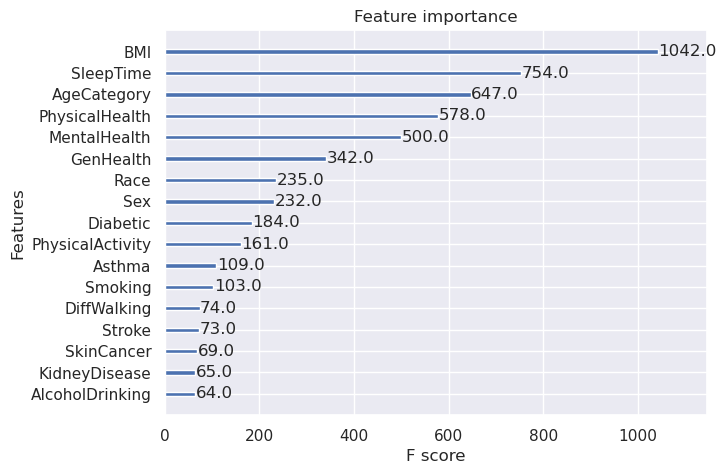

In [112]:
fig, ax = plt.subplots(figsize=(7,5))
xgb.plot_importance(xgb_class, ax=ax)
plt.show()